# Lane Detection notebook
## testing and improvment stage

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def region(image):
    height, width = image.shape[0], image.shape[1]
    triangle = np.array([
                       [(100, height), (475, 300), (width, height)]
                       ])
    
    mask = np.zeros_like(image)
    
    mask = cv2.fillPoly(mask, triangle, 255)
    mask = cv2.bitwise_and(image, mask)
    return mask

In [3]:
captured = cv2.imread("CarND-LaneLines-P1\\test_images\\solidWhiteCurve.jpg")

# Check if the image was loaded successfully
if captured is  None:
    print("Failed to load the image.")

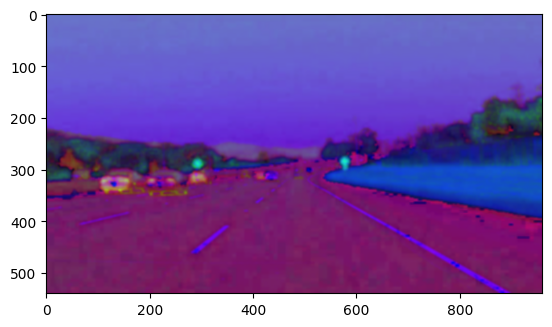

In [4]:
# Convert the image to grayscale
frame = cv2.cvtColor(captured, cv2.COLOR_BGR2HSV)
frame = cv2.GaussianBlur(frame, (5, 5), 3)
plt.imshow(frame)

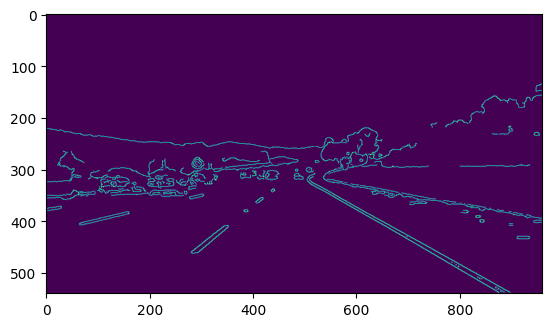

In [5]:
edges = cv2.Canny(frame, 75, 150)
plt.imshow(edges)

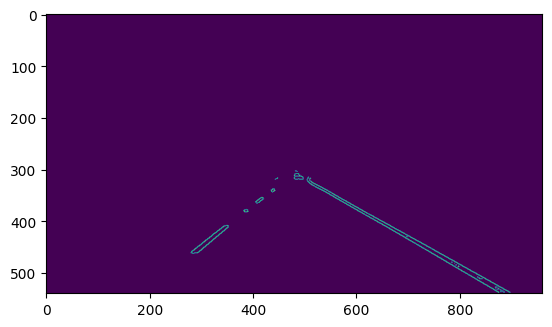

In [6]:
edges = region(edges)
plt.imshow(edges)

In [7]:
lines = cv2.HoughLinesP(edges, 2, np.pi/180, threshold= 100, maxLineGap=150)

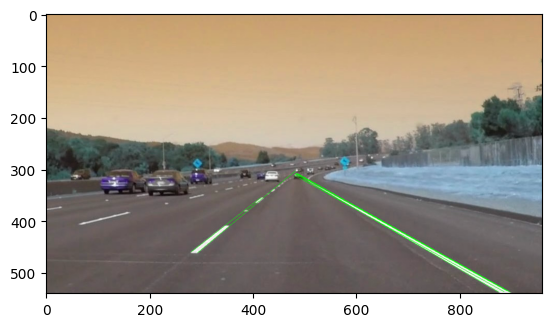

In [8]:
def display_lines(image, lines):
    lines_image = np.copy(image)  # Create a copy of the original image
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]  # Extract line coordinates
            cv2.line(lines_image, (x1, y1), (x2, y2), (0, 255, 0), 1)  # Draw the line in red (0, 0, 255)

    return lines_image

result_image = display_lines(captured, lines)
plt.imshow(result_image)
plt.show()

# Iterating over testing images

In [9]:
import os
import glob
import script
folder_path = 'CarND-LaneLines-P1\\test_images'
folder_path2= 'More Lane imgs'
image_files = glob.glob(os.path.join(folder_path, '*.jpg')) + glob.glob(os.path.join(folder_path2, '*.jpg'))
print (image_files)

['CarND-LaneLines-P1\\test_images\\solidWhiteCurve.jpg', 'CarND-LaneLines-P1\\test_images\\solidWhiteRight.jpg', 'CarND-LaneLines-P1\\test_images\\solidYellowCurve.jpg', 'CarND-LaneLines-P1\\test_images\\solidYellowCurve2.jpg', 'CarND-LaneLines-P1\\test_images\\solidYellowLeft.jpg', 'CarND-LaneLines-P1\\test_images\\whiteCarLaneSwitch.jpg', 'More Lane imgs\\campus_day_1 018.jpg', 'More Lane imgs\\Cover_1.jpg', 'More Lane imgs\\images (1).jpg', 'More Lane imgs\\images.jpg', 'More Lane imgs\\lanefollowing-center_image.jpg']


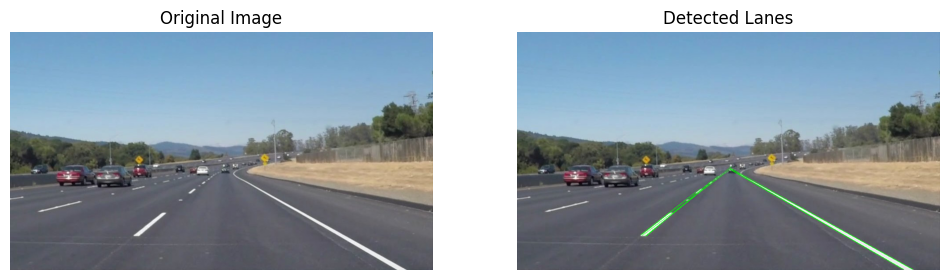

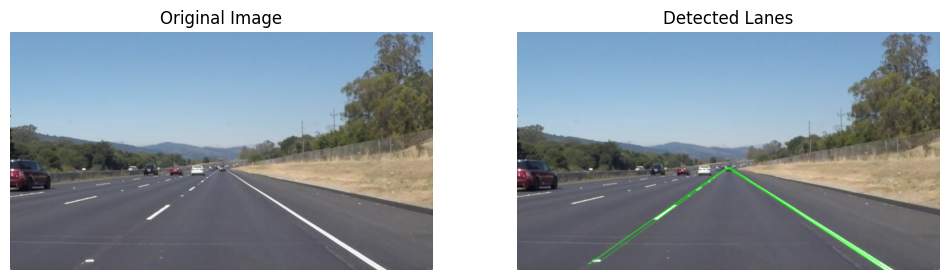

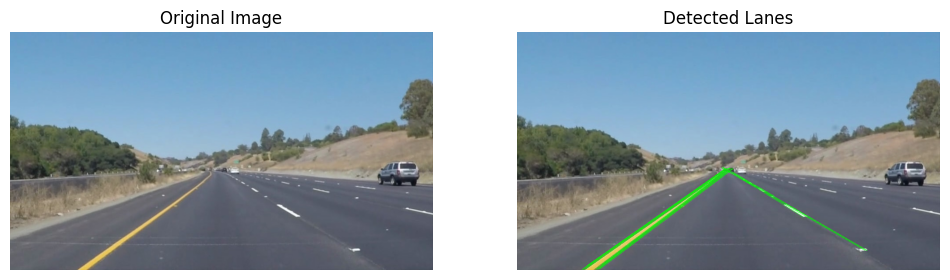

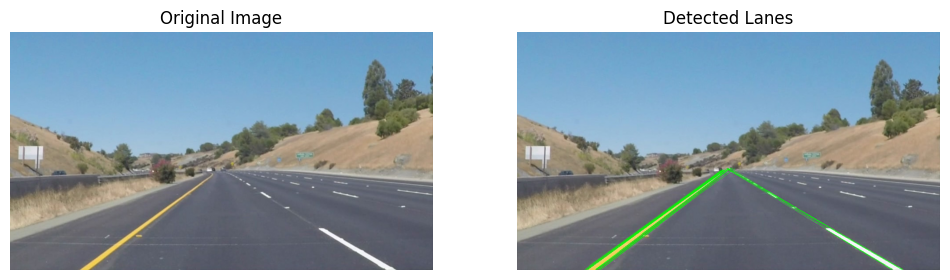

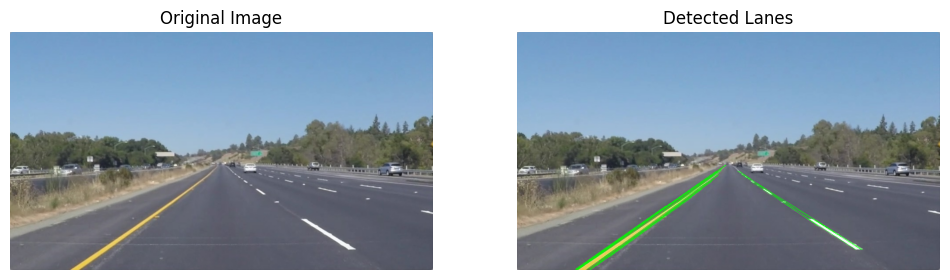

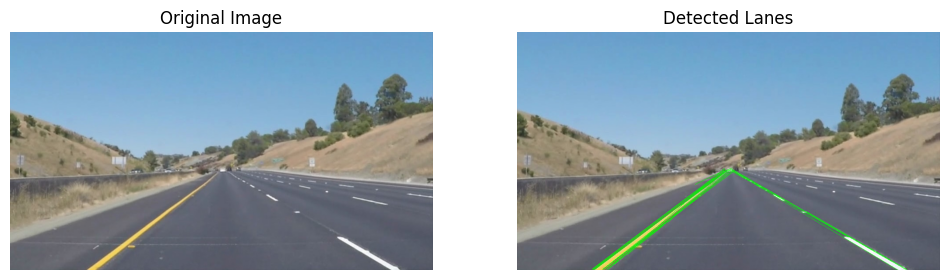

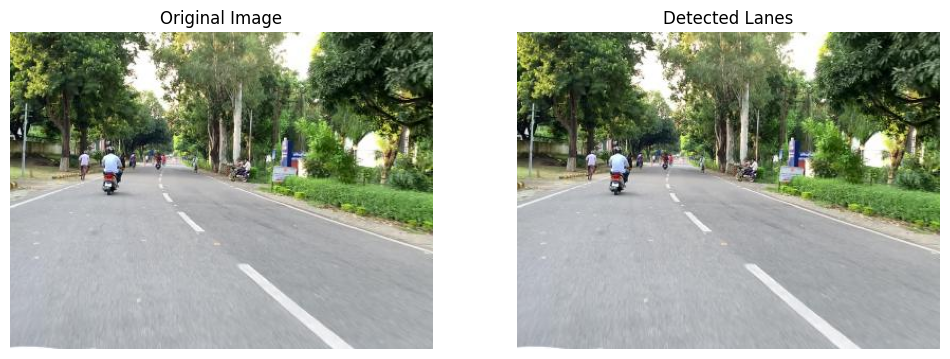

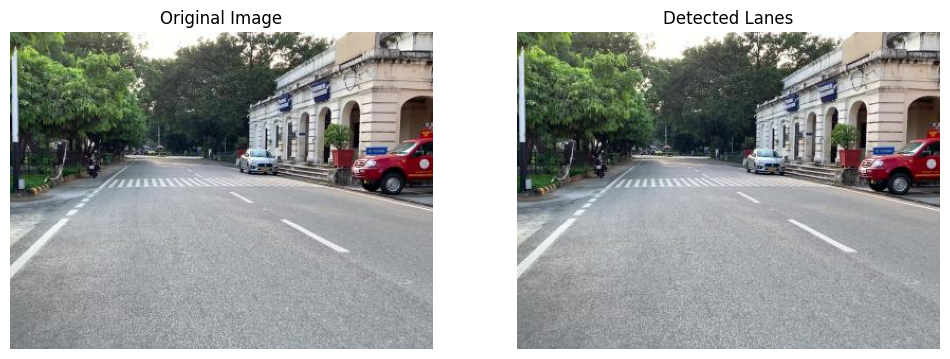

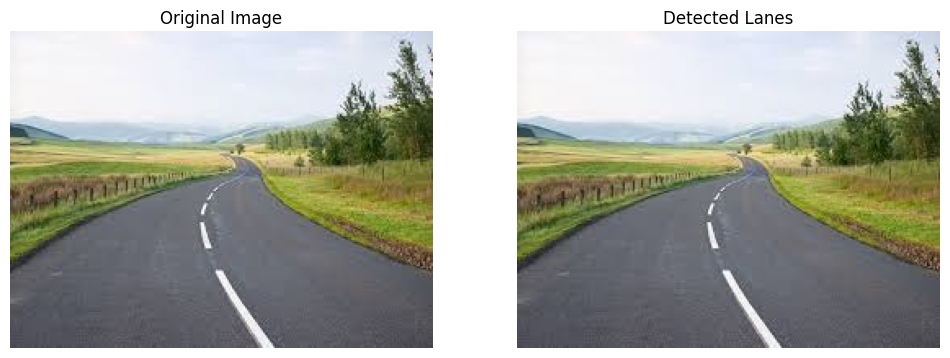

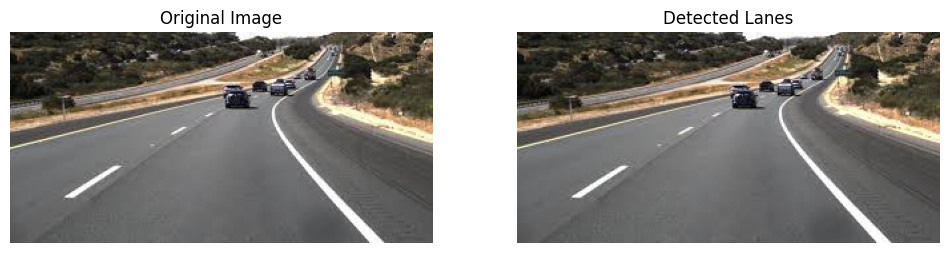

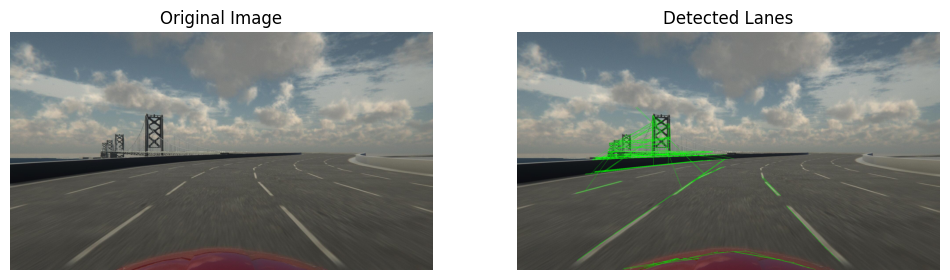

In [10]:
for image_file in image_files:
    readimg = cv2.imread(image_file)
    script.laneDetect(readimg)